# Lecture 3: DFT Hands-On (Discrete Fourier Transform)
Use this after the sampling/operations segment.

You’ll cover:
- DFT peaks for sinusoids
- Frequency resolution and leakage
- Windowing and zero-padding
- Two-tone mixture
- Speech-like harmonic structure
- STFT preview


In [45]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from IPython.display import Audio, display

def plot_time(sig, fs, title='', tmax=0.05):
    nmax = min(len(sig), int(tmax*fs))
    t = np.arange(nmax)/fs
    plt.figure()
    plt.plot(t, sig[:nmax])
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.title(title)
    plt.grid(True)
    plt.show()

def plot_mag_spectrum(sig, fs, title='', nfft=None):
    sig = np.asarray(sig)
    n = len(sig) if nfft is None else int(nfft)
    X = np.fft.rfft(sig, n=n)
    f = np.fft.rfftfreq(n, 1/fs)
    mag = 20*np.log10(np.abs(X) + 1e-12)
    plt.figure()
    plt.plot(f, mag)
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude (dB)')
    plt.title(title)
    plt.grid(True)
    plt.show()

def play(sig, fs, label=''):
    if label:
        print(label)
    display(Audio(sig, rate=fs))


## 1) Warm-up: one sinusoid
**** If the signal is a 440 Hz sine wave, where should the DFT peak appear?


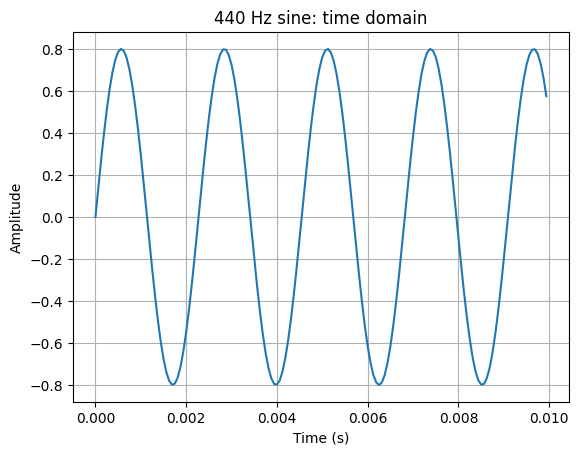

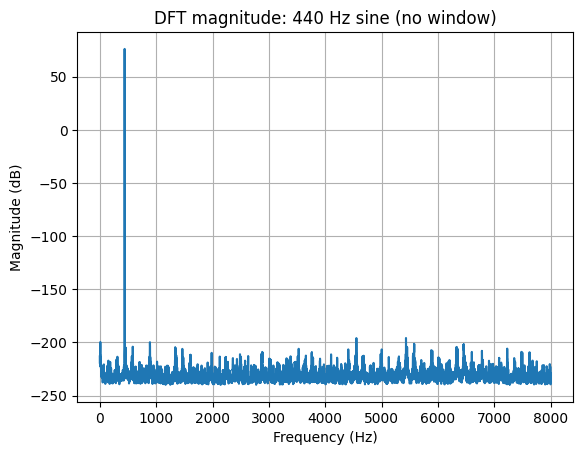

Listen: 440 Hz


In [46]:
fs = 16000
T = 1.0
t = np.arange(int(T*fs)) / fs
f0 = 440.0
x = 0.8*np.sin(2*np.pi*f0*t)
plot_time(x, fs, '440 Hz sine: time domain', tmax=0.01)
plot_mag_spectrum(x, fs, 'DFT magnitude: 440 Hz sine (no window)')
play(x, fs, 'Listen: 440 Hz')


In [47]:
np.size(t)

16000

## 2) Frequency resolution and leakage
If f0 is not aligned to a DFT bin, you’ll see leakage.

**:** What changes when we apply a window (Hann)?


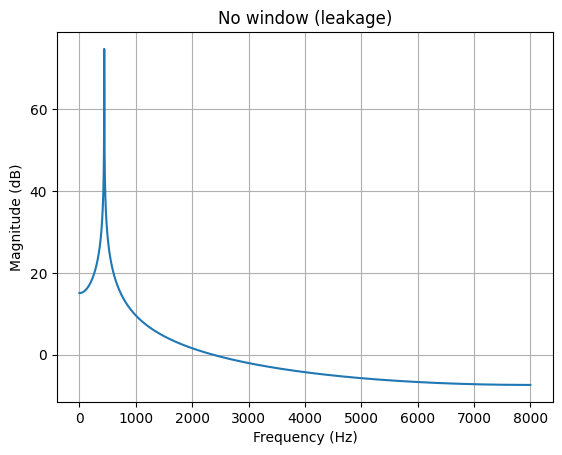

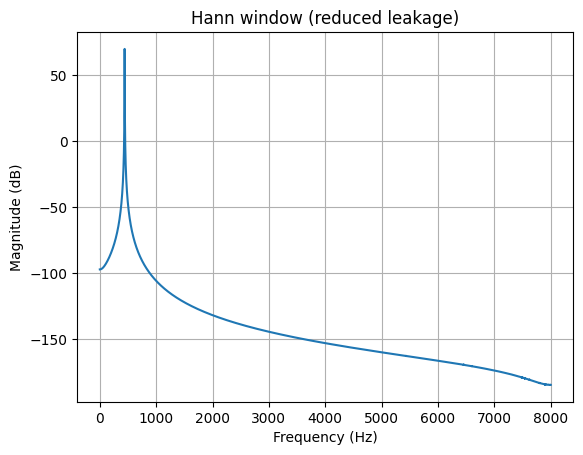

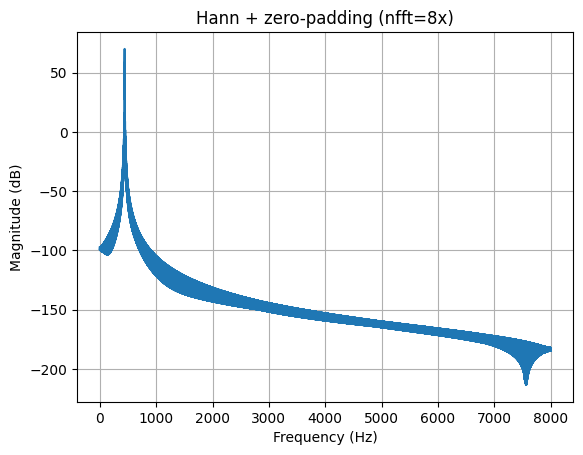

In [48]:
f0 = 440.3
x = 0.8*np.sin(2*np.pi*f0*t)
plot_mag_spectrum(x, fs, 'No window (leakage)')
#plot_mag_spectrum(x, fs, 'No window + zero-padding (nfft=8x)', nfft=8*len(x))

w = np.hanning(len(x))
xw = x*w
plot_mag_spectrum(xw, fs, 'Hann window (reduced leakage)')
plot_mag_spectrum(xw, fs, 'Hann + zero-padding (nfft=8x)', nfft=8*len(xw))


## 3) Two-tone mixture
How many peaks do you expect? Can you estimate their locations?


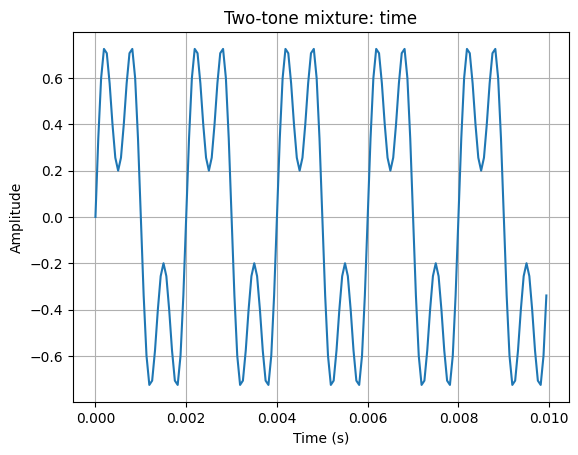

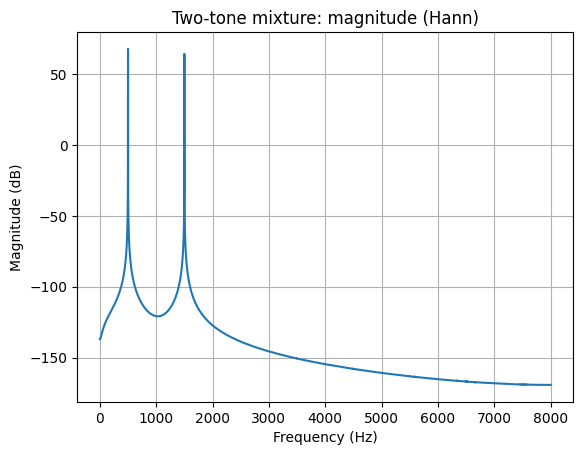

In [49]:
f1, f2 = 500, 1500
x = 0.6*np.sin(2*np.pi*f1*t) + 0.4*np.sin(2*np.pi*f2*t)
plot_time(x, fs, 'Two-tone mixture: time', tmax=0.01)
plot_mag_spectrum(x*np.hanning(len(x)), fs, 'Two-tone mixture: magnitude (Hann)')


## 4) DFT of a voiced-like signal + STFT preview
Speech is non-stationary, so we preview STFT to motivate short-time processing.


Synthetic voiced-like sound


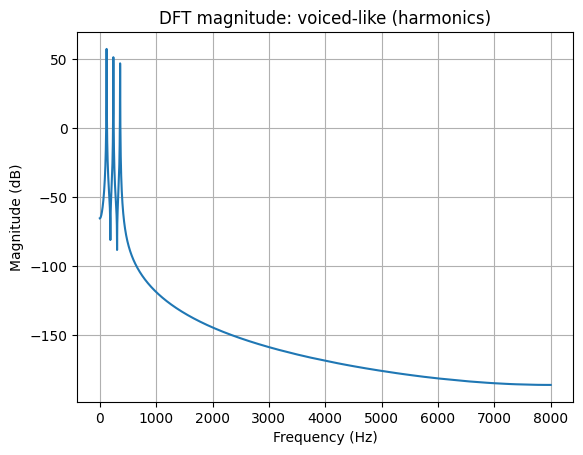

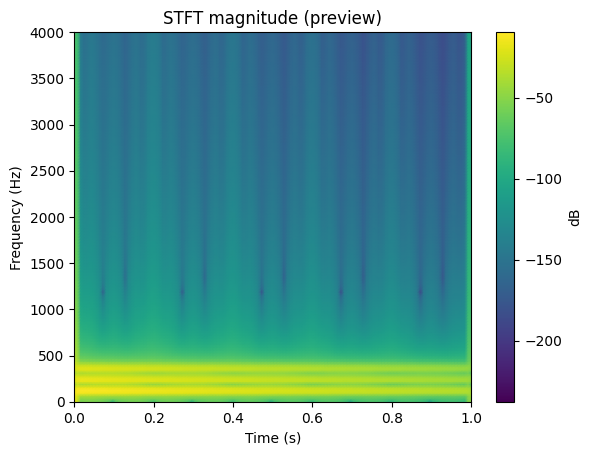

In [50]:
f0 = 120
env = np.exp(-3*t)
x = env*(np.sin(2*np.pi*f0*t) + 0.5*np.sin(2*np.pi*2*f0*t) + 0.3*np.sin(2*np.pi*3*f0*t))
x = x / (np.max(np.abs(x)) + 1e-12)
play(x, fs, 'Synthetic voiced-like sound')
plot_mag_spectrum(x*np.hanning(len(x)), fs, 'DFT magnitude: voiced-like (harmonics)')

f, tt, Zxx = signal.stft(x, fs=fs, nperseg=512, noverlap=384, window='hann')
plt.figure()
plt.pcolormesh(tt, f, 20*np.log10(np.abs(Zxx)+1e-12), shading='gouraud')
plt.ylim(0, 4000)
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('STFT magnitude (preview)')
plt.colorbar(label='dB')
plt.show()


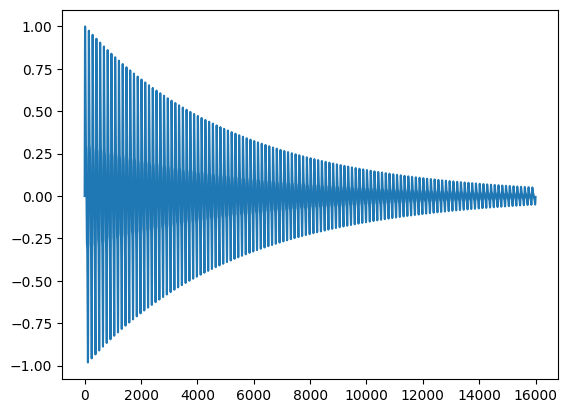

In [54]:
plt.plot(x)


## 5) In-class quick checks
- What does Nyquist mean in the frequency plot?
- Why does windowing reduce leakage?
- What does zero-padding do (and not do)?
- Why is STFT needed for speech instead of one global DFT?
